<a href="https://colab.research.google.com/github/JaneSwissAust/2022_Intro_Python/blob/main/Exercises/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Analyzing Ocean Floats Data using Numpy and Matplotlib

**Learning Goals**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

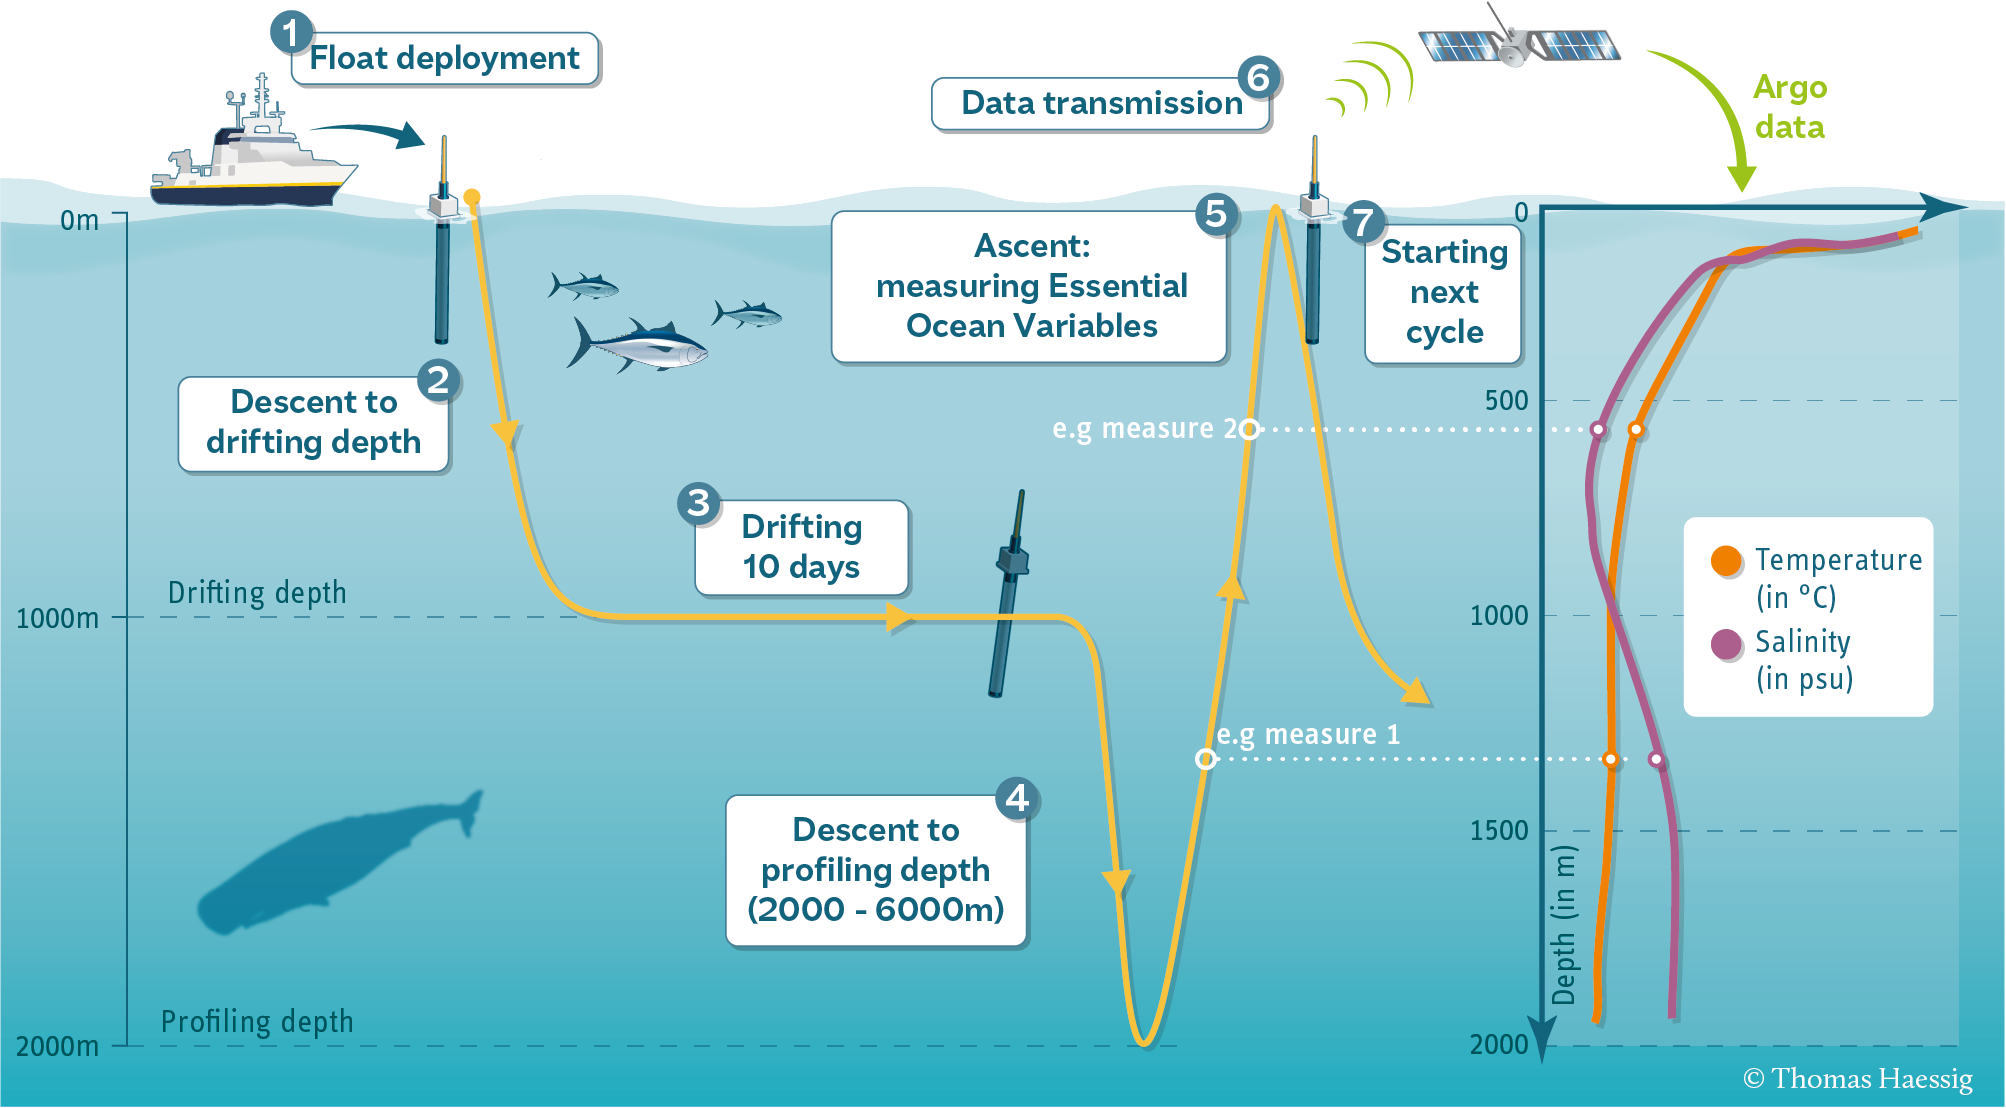


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [144]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy']

In [148]:
import numpy as np
sorted(files)

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy']

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [149]:
import os

for i in range (0, len(files)):
  file_path = files[i]
  head, tail =os.path.split(file_path)
  print(tail)


S.npy
lat.npy
P.npy
lon.npy
T.npy
levels.npy
date.npy


Then, load the files as `numpy` arrays, for instance using list comprehension

In [150]:
S,lat,P,lon,T,levels,date = [np.load(files[i]) for i in range(0,len(files))]

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [151]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [152]:
level_arange = np.arange(0,78)
print(level_arange)
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [98]:
np.testing.assert_equal(levels,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [153]:
level_linspace = np.linspace(0,77,78,dtype=int)
print(level_linspace)
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [154]:
from numpy.testing._private.utils import assert_equal
np.testing.assert_equal(levels,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [155]:

print('levels.shape', levels.shape)

print('lon.shape', lon.shape)
print('lat.shape', lat.shape)
print('dates.shape', date.shape)

print('S.shape', S.shape) 
print('T.shape', T.shape)
print('P.shape', P.shape)




levels.shape (78,)
lon.shape (75,)
lat.shape (75,)
dates.shape (75,)
S.shape (78, 75)
T.shape (78, 75)
P.shape (78, 75)


In [161]:
print('one dimensional: rows ')
print('levels.shape', levels.shape, '\n')

print('one dimensional:columns ')
print('lon.shape', lon.shape)
print('lat.shape', lat.shape)
print('dates.shape', date.shape, '\n')

print('two dimensional: rows (level), columns (date,lat, lon) ')
print('S.shape', S.shape) 
print('T.shape', T.shape)
print('P.shape', P.shape)

flatS=S.flatten()
sl_flatS = flatS[0:78]
print('sl_flatS.shape',sl_flatS.shape)


flatT=T.flatten()
sl_flatT = flatT[0:78]
print('sl_flatT.shape',sl_flatT.shape)

flatP=P.flatten()
sl_flatP = flatP[0:78]
print('sl_flatP.shape',sl_flatP.shape)




one dimensional: rows 
levels.shape (78,) 

one dimensional:columns 
lon.shape (75,)
lat.shape (75,)
dates.shape (75,) 

two dimensional: rows (level), columns (date,lat, lon) 
S.shape (78, 75)
T.shape (78, 75)
P.shape (78, 75)
sl_flatS.shape (78,)
sl_flatT.shape (78,)
sl_flatP.shape (78,)


Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources: 

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [124]:
a = 7.718e-1 
b = -8.44e-2 
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure. 

In [125]:
!pip install gsw
from gsw import CT_from_t

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 17.6 MB/s 


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [167]:
CT = CT_from_t(S,T,P)
#flatCT = CT_from_t(sl_flatS,sl_flatT,sl_flatP)
#print(CT)
#print(flatCT)
#flattening makes no difference

Calculate the `relative density` using the equation above

In [168]:
relative_density = a*S + b*CT + CT**2
#print(relative_density)

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and 
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [169]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions. 

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

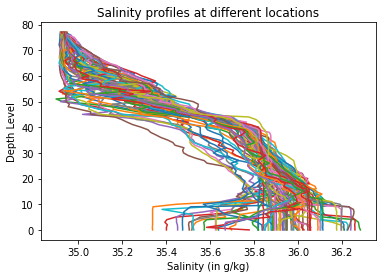

Text(0.5, 1.0, 'Salinity Profiles at Different Levels')

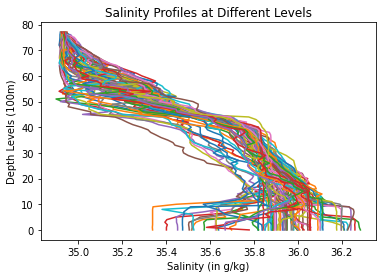

In [172]:
plt.plot(S,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Salinity (in g/kg)') # Takes a string as argument
plt.ylabel('Depth Levels (100m)')
plt.title('Salinity Profiles at Different Levels')

Make more plots below:

Text(0.5, 1.0, 'Temperature Profiles at Different Levels')

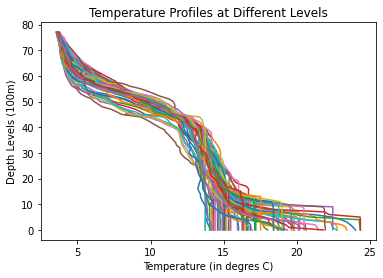

In [173]:
plt.plot(T,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Temperature (in degres C)') # Takes a string as argument
plt.ylabel('Depth Levels (100m)')
plt.title('Temperature Profiles at Different Levels')

Text(0.5, 1.0, 'Pressure Profiles at Different Levels')

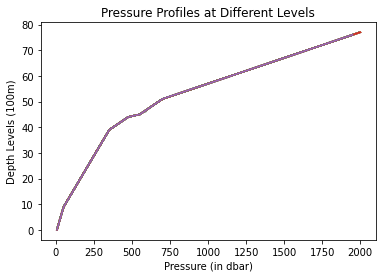

In [174]:
plt.plot(P,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Pressure (in dbar)') # Takes a string as argument
plt.ylabel('Depth Levels (100m)')
plt.title('Pressure Profiles at Different Levels')

Text(0.5, 1.0, 'Relative Density Profiles at Different Levels')

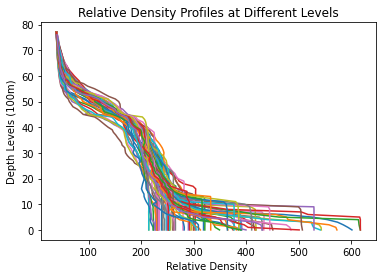

In [175]:
plt.plot(relative_density,levels); # The semi-colon prevents printing the line objects
plt.xlabel('Relative Density ') # Takes a string as argument
plt.ylabel('Depth Levels (100m)')
plt.title('Relative Density Profiles at Different Levels')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [214]:
#meanS = np.mean(S,axis=0)
#print('mean S 0: ', meanS, meanS.shape)

meanS = np.mean(S,axis=1)
print('mean S 1: ', meanS, meanS.shape)

#meanflatS = np.mean(sl_flatS,axis=0)
#print('mean flat S: ', meanflatS, meanflatS.shape)

#remove nans
##nonansS=S[np.isfinite(S)]
##meannnS = np.mean(nonansS,axis=0)
##print('mean nn S: ', '{0:.2f}'.format(meannnS), meannnS.shape)

#print('mean flat S: ', '{0:.2f}'.format(meannnS), meannnS.shape)

#nonans_meanflatS = np.mean(sl_flatS,axis=0)
#print('mean flat S: ', meanflatS, meanflatS.shape)



mean S 1:  [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328         nan         nan         nan
         nan         nan         nan         nan         nan         nan] (78,)


In [217]:
meanS = np.mean(S,axis=1)
#print('mean S 1: ', meanS, meanS.shape)

meanT = np.mean(T,axis=1)
#print('mean T 1: ', meanT, meanT.shape)

meanP = np.mean(P,axis=1)
#print('mean P 1: ', meanP, meanP.shape)

meanRD = np.mean(relative_density,axis=1)
#print('mean RD 1: ', meanS, meanRD.shape)



#nonansT=T[np.isfinite(T)]
#meannnT = np.mean(nonansT,axis=0)
#print('mean nn T: ', '{0:.2f}'.format(meannnT), meannnT.shape)

#nonansP=P[np.isfinite(P)]
#meannnP = np.mean(nonansP,axis=0)
#print('mean nn P: ', '{0:.2f}'.format(meannnP), meannnP.shape)

#nonansRD=relative_density[np.isfinite(relative_density)]
#meannnRD = np.mean(nonansRD,axis=0)
#print('mean nn P: ', '{0:.2f}'.format(meannnRD), meannnRD.shape)



... and the standard deviations.

In [218]:
#SDS = np.std(nonansS,axis=0)
#print('std deviation nn S: ', '{0:.2f}'.format(SDS), SDS.shape)

#SDP = np.std(nonansP,axis=0)
#print('std deviation nn P: ', '{0:.2f}'.format(SDP), SDP.shape)

#SDT = np.std(nonansT,axis=0)
#print('std deviation nn T: ', '{0:.2f}'.format(SDT), SDT.shape)

#SDRD = np.std(nonansRD,axis=0)
#print('std deviation nn P: ', '{0:.2f}'.format(SDRD), SDRD.shape)

SDS = np.std(S,axis=1)
#print('std deviation  S: ', SDS)

SDP = np.std(P,axis=1)
#print('std deviation  P: ', SDP)


SDT = np.std(T,axis=1)
#print('std deviation  T: ', SDT)

SDRD = np.std(relative_density,axis=1)
#print('std deviation  P: ', SDRD)

#SDS = np.std(S,axis=1)
#print('std deviation  S: ', '{0:.2f}'.format(SDS), SDS.shape)

#SDP = np.std(P,axis=1)
#print('std deviation  P: ', '{0:.2f}'.format(SDP), SDP.shape)

#SDT = np.std(T,axis=1)
#print('std deviation  T: ', '{0:.2f}'.format(SDT), SDT.shape)

#SDRD = np.std(relative_density,axis=1)
#print('std deviation nn P: ', '{0:.2f}'.format(SDRD), SDRD.shape)








Check that they have the same shape as your vertical level `lev` coordinate:

In [219]:
np.testing.assert_equal(SDS.shape,levels.shape) 
np.testing.assert_equal(SDT.shape,levels.shape) 
np.testing.assert_equal(SDP.shape,levels.shape) 
np.testing.assert_equal(SDRD.shape,levels.shape) 

np.testing.assert_equal(meanS.shape,levels.shape) 
np.testing.assert_equal(meanT.shape,levels.shape) 
np.testing.assert_equal(meanP.shape,levels.shape) 
np.testing.assert_equal(meanRD.shape,levels.shape) 


**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

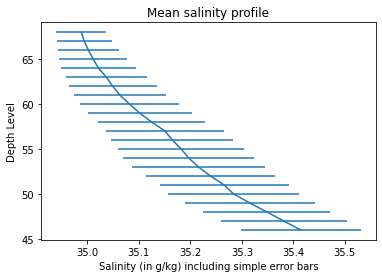

Text(0.5, 1.0, 'Mean Salinity per 100m')

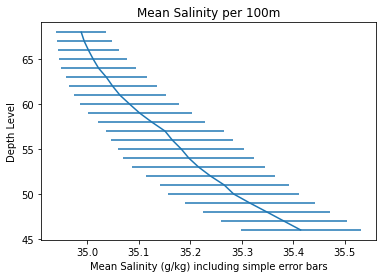

In [221]:
plt.errorbar(meanS,levels,xerr=SDS);
plt.xlabel('Mean Salinity (g/kg) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean Salinity per 100m')

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean Temperature per 100m')

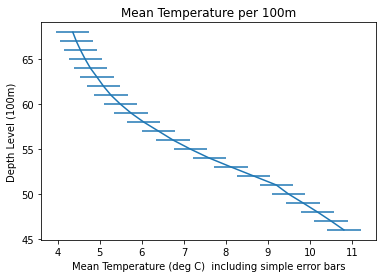

In [237]:
plt.errorbar(meanT,levels,xerr=SDS);
plt.xlabel('Mean Temperature (deg C)  including simple error bars')
plt.ylabel('Depth Level (100m)')
plt.title('Mean Temperature per 100m')

Text(0.5, 1.0, 'MEan Pressure per 100m')

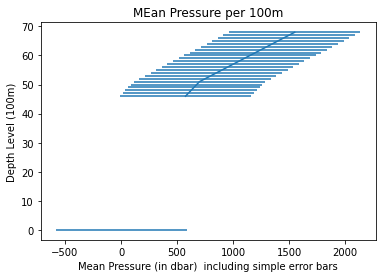

In [236]:
plt.errorbar(meanP,levels,xerr=SDP)
plt.xlabel('Mean Pressure (in dbar)  including simple error bars')
plt.ylabel('Depth Level (100m)')
plt.title('MEan Pressure per 100m')

Text(0.5, 1.0, 'Mean Relative Density per 100m')

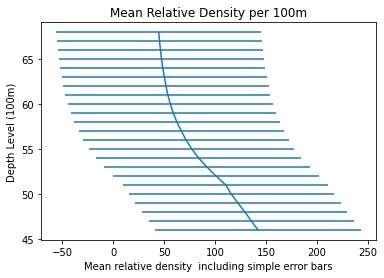

In [240]:
plt.errorbar(meanRD,levels,xerr=SDRD);
plt.xlabel('Mean relative density  including simple error bars')
plt.ylabel('Depth Level (100m)')
plt.title('Mean Relative Density per 100m')

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [229]:
#remove nans
nonansS=S[np.isfinite(S)]
meannnS = np.mean(nonansS,axis=0)
print('mean nn S: ', '{0:.2f}'.format(meannnS), meannnS.shape)

nonansT=T[np.isfinite(T)]
meannnT = np.mean(nonansT,axis=0)
print('mean nn T: ', '{0:.2f}'.format(meannnT), meannnT.shape)

nonansP=P[np.isfinite(P)]
meannnP = np.mean(nonansP,axis=0)
print('mean nn P: ', '{0:.2f}'.format(meannnP), meannnP.shape)

nonansRD=relative_density[np.isfinite(relative_density)]
meannnRD = np.mean(nonansRD,axis=0)
print('mean nn P: ', '{0:.2f}'.format(meannnRD), meannnRD.shape)





mean nn S:  35.53 ()
mean nn T:  11.10 ()
mean nn P:  617.76 ()
mean nn P:  170.07 ()


Similarly, recalculate the standard deviations ignoring the missing values.

In [230]:
SDS = np.std(nonansS,axis=0)
print('std deviation nn S: ', '{0:.2f}'.format(SDS), SDS.shape)

SDP = np.std(nonansP,axis=0)
print('std deviation nn P: ', '{0:.2f}'.format(SDP), SDP.shape)

SDT = np.std(nonansT,axis=0)
print('std deviation nn T: ', '{0:.2f}'.format(SDT), SDT.shape)

SDRD = np.std(nonansRD,axis=0)
print('std deviation nn P: ', '{0:.2f}'.format(SDRD), SDRD.shape)


std deviation nn S:  0.40 ()
std deviation nn P:  586.41 ()
std deviation nn T:  4.66 ()
std deviation nn P:  100.79 ()


**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface. 

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

Text(0.5, 1.0, 'Mean Relative Density per 100m')

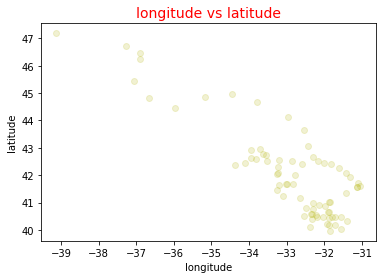

In [254]:
from matplotlib.markers import MarkerStyle
plt.scatter(lon,lat, c='#bcbd22', alpha=0.2);
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.title('longitude vs latitude', fontsize=14, color='red')
___ # Fancy bonuses
___ # More fancy bonuses